In [19]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from scipy.signal import find_peaks

In [20]:
# Set the style of the plots to a more beautiful format
az.style.use('arviz-whitegrid')

In [21]:
# RK4 Method
def ode_RK4(f, X_0, dt, T,a,b,c,d):    
    N_t = int(round(T/dt))
    # Initial conditions
    usol = [X_0]
    u = np.copy(X_0)
    
    tt = np.linspace(0, N_t*dt, N_t + 1)
    # RK4
    for t in tt[:-1]:
        u1 = f(u + 0.5*dt* f(u, t,a,b,c,d), t + 0.5*dt,a,b,c,d)
        u2 = f(u + 0.5*dt*u1, t + 0.5*dt,a,b,c,d)
        u3 = f(u + dt*u2, t + dt,a,b,c,d)
        u = u + (1/6)*dt*( f(u, t,a,b,c,d) + 2*u1 + 2*u2 + u3)
        usol.append(u)
    return usol, tt


# System of ODES
def f(u,t, a,b,c,d):
        x, y, z = u 
        dxdt = a * y
        dydt = x + z*z
        dzdt = b + c*x + d*z
        return np.asarray([dxdt, dydt, dzdt])

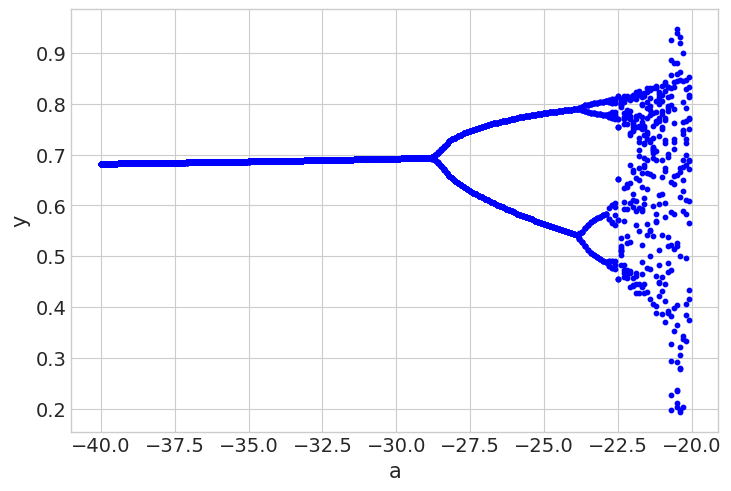

In [22]:
# Step size
dt = 0.001
T = 100

# Parameters
#a = -20   
b = 1
c = 1.68
d = -1

plt.figure()
for a in np.arange(-40,-20,0.1):
    u, t = ode_RK4(f, np.array([-0.201,-0.001,0.41]), dt, T,a,b,c,d)

    y = [a[1] for a in u[80000:]]

    peaks, _ = find_peaks(y, height=0)
    yy = [y[element] for element in peaks]
    plt.scatter(np.ones(len(yy))*a,yy,color='blue',s=10)
    plt.xlabel('a')
    plt.ylabel('y')

plt.savefig('y(a).png')